## 2020-08-09 Plot some standard metrics ##

Notebook to plot the number of visits in a given filter in Galactic coords. Borrows from Owen Boberg's **Spatial Coordinates** tutorial notebook that does something similar: https://github.com/LSST-nonproject/sims_maf_contrib/blob/master/tutorials/Spatial_Coordinates.ipynb

Runs on Sciserver.

In [11]:
%matplotlib inline
import numpy as np
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

In [12]:
# Set up the database connection
dbName = 'baseline_v1.5_10yrs.db'
dbroot='/home/idies/workspace/lsst_cadence/FBS_1.5/'
opsdb = db.OpsimDatabase(dbroot+dbName)
outDir = 'plot_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 64

# nside=128 # much slower but figure looks slightly nicer


In [13]:
filterStr = 'r'
nYears = 10
sql = 'filter="%s" and night < %i' % (filterStr, 365.25*nYears)
metric = metrics.CountMetric(col='observationStartMJD')
slicer = slicers.HealpixSlicer(latCol='galb', lonCol='gall', latLonDeg=False, nside=nside)
# slicer = slicers.HealpixSlicer(nside=nside)

# do log color scale?
showLog = True

# Set the plot limits depending on whether log plot or not
colorMin = 0.
colorMax = 300.
nTicks = 3
cmap='inferno' # 'RdBu' looks a bit more clear cut

if showLog:
    colorMin = 10.
    colorMax = 1000.
    nTicks = 3.
    cmap='inferno'
    
sLabel = 'Visit count'
sTitle = '%s, %s, MJD < %.1f years: %s' % (dbName, filterStr, nYears, sLabel)
plotDict = {'colorMin': colorMin, 'colorMax':colorMax,'logScale':showLog, 'title':sTitle, \
            'xlabel':sLabel, 'cmap':cmap, 'nTicks':nTicks}
# only plot the sky maps for now
plotFuncs = [plots.HealpixSkyMap()]
bundle = metricBundles.MetricBundle(
    metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint filter="r" and night < 3652 for columns ['fieldDec', 'observationStartMJD', 'fieldRA']
Found 487112 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 3652" constraint now.
Plotting complete.


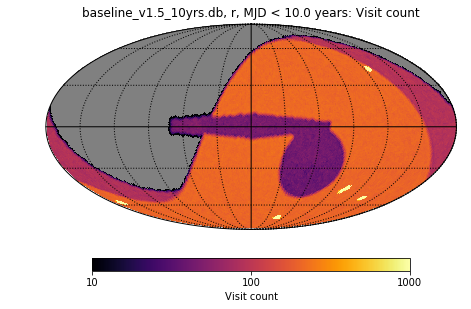

In [14]:
bg = metricBundles.MetricBundleGroup({0: bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


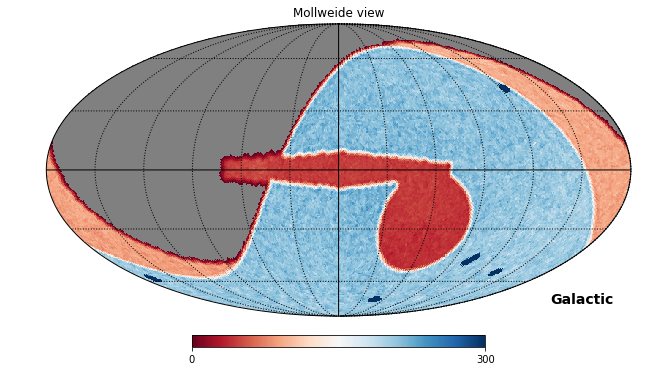

In [15]:
# The following lines are useful for playing with the plotting, since they only require
# re-plotting rather than re-running and re-plotting. HOWEVER healpy's mollview appears 
# to have no mechanism to add ticks to the colorbar (as of 2020-08-09).
#hp.mollview(np.log10(np.abs(bundle.metricValues)), cmap='inferno', coord='G', min=1, max=3)
hp.mollview(bundle.metricValues, cmap='RdBu', coord='G', min=0., max=300)
hp.graticule()